# Exercises
Do your work for these exercises in a jupyter notebook named scaling. Use the telco dataset you acquired and prepped in previous lesson. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

- 1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution.
- 2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?
- 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.
- 4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?
- 5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [1]:
# imports for exercises 

import pandas as pd
import numpy as np
import env
import wrangle
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.model_selection import train_test_split

In [2]:
# data wrangling
df = wrangle.wrangle_telco()

In [3]:
df.head()

,customer_id,total_charges,monthly_charges,tenure
0,0002-ORFBO,593.30,65.60,9
1,0003-MKNFE,542.40,59.90,9
2,0013-MHZWF,571.45,69.40,9
3,0015-UOCOJ,340.35,48.20,7
4,0016-QLJIS,5957.90,90.45,65


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      7032 non-null   object 
 1   total_charges    7032 non-null   float64
 2   monthly_charges  7032 non-null   float64
 3   tenure           7032 non-null   int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 274.7+ KB


In [5]:
# split the data in train, validate and test
train, test = train_test_split(df, test_size = 0.2, random_state = 1349)
train, validate = train_test_split(train, test_size = 0.25, random_state = 1349)

In [6]:
# check the shape
train.shape, validate.shape, test.shape

((4218, 4), (1407, 4), (1407, 4))

In [7]:
train.head()

,customer_id,total_charges,monthly_charges,tenure
566,2474-LCNUE,1642.75,73.65,23
3800,4465-VDKIQ,1358.60,77.80,18
328,1410-RSCMR,515.75,71.35,7
6182,4323-ELYYB,218.55,20.00,13
1289,5356-CSVSQ,174.20,64.60,3


**1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution.**

In [8]:
# Define the thing
scaler = sklearn.preprocessing.MinMaxScaler()

# Fit the thing
# scaler.fit(train[['monthly_charges']])

# transform
# scaled = scaler.transform(train[['monthly_charges']])

# single step to fit and transform
scaled = scaler.fit_transform(train[['monthly_charges']])

In [9]:
scaled

array([[0.55124378],
       [0.59253731],
       [0.52835821],
       ...,
       [0.64577114],
       [0.67114428],
       [0.51741294]])

In [10]:
# making a new 'scaled' column inthe original dataframe: 
train['monthly_charges_scaled'] = scaled

In [11]:
train.head()

,customer_id,total_charges,monthly_charges,tenure,monthly_charges_scaled
566,2474-LCNUE,1642.75,73.65,23,0.551244
3800,4465-VDKIQ,1358.60,77.80,18,0.592537
328,1410-RSCMR,515.75,71.35,7,0.528358
6182,4323-ELYYB,218.55,20.00,13,0.017413
1289,5356-CSVSQ,174.20,64.60,3,0.461194


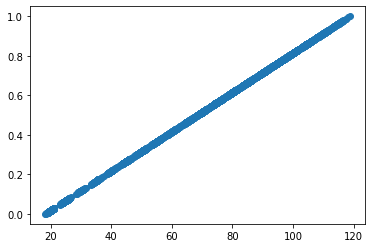

In [12]:
# visualizing the results for the unscaled disctribution: 
plt.scatter(train.monthly_charges, scaled)

(array([961., 123., 227., 348., 299., 538., 583., 515., 448., 176.]),
 array([ 18.25,  28.3 ,  38.35,  48.4 ,  58.45,  68.5 ,  78.55,  88.6 ,
         98.65, 108.7 , 118.75]),
 <BarContainer object of 10 artists>)

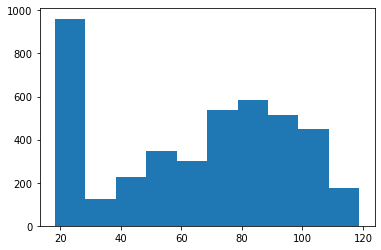

In [13]:
plt.hist(train.monthly_charges)

(array([961., 123., 227., 348., 299., 536., 583., 517., 448., 176.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

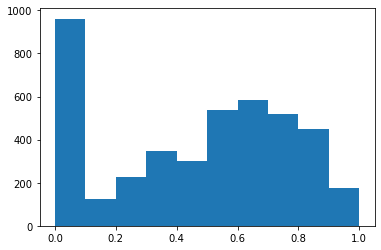

In [14]:
plt.hist(scaled)

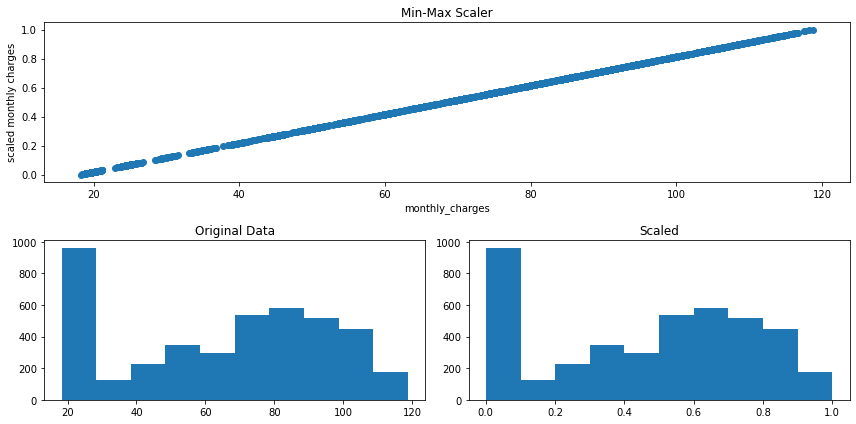

In [15]:
fig = plt.figure(figsize = (12,6))

gs = plt.GridSpec(2,2)

ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])

ax1.scatter(train.monthly_charges, scaled)
ax1.set(xlabel = 'monthly_charges', ylabel = 'scaled monthly charges', title = 'Min-Max Scaler')

ax2.hist(train.monthly_charges)
ax2.set(title = 'Original Data')

ax3.hist(scaled)
ax3.set(title='Scaled')
plt.tight_layout();

In [16]:
def visualize_scaled_data(scaler, scaler_name, feature):
    scaled = scaler.fit_transform(train[[feature]])
    fig = plt.figure(figsize = (12,6))
    
    gs = plt.GridSpec(2,2)
    
    ax1 = fig.add_subplot(gs[0, :])
    ax2 = fig.add_subplot(gs[1,0])
    ax3 = fig.add_subplot(gs[1,1])
    
    ax1.scatter(train[[feature]], scaled)
    ax1.set(xlabel = feature, ylabel = 'Scaled_' + feature, title = scaler_name)
    
    ax2.hist(train[[feature]])
    ax2.set(title = 'Original')
    
    ax3.hist(scaled)
    ax3.set(title = 'Scaled')
    plt.tight_layout;

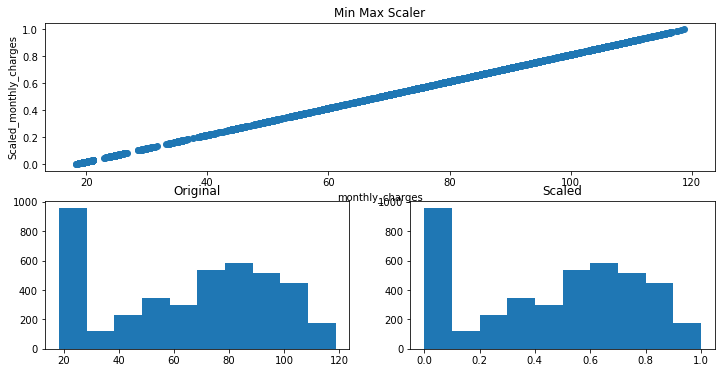

In [17]:
visualize_scaled_data(sklearn.preprocessing.MinMaxScaler(), 'Min Max Scaler', 'monthly_charges')

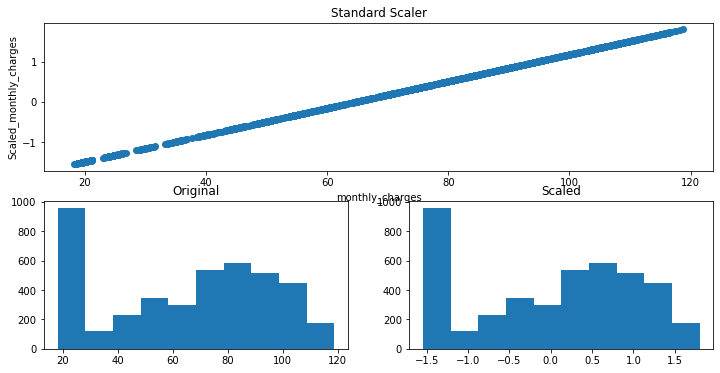

In [18]:
visualize_scaled_data(sklearn.preprocessing.StandardScaler(), 'Standard Scaler', 'monthly_charges')

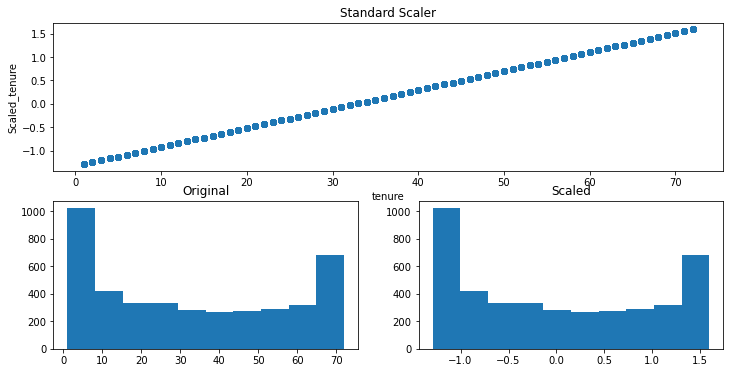

In [19]:
visualize_scaled_data(sklearn.preprocessing.StandardScaler(), 'Standard Scaler', 'tenure')

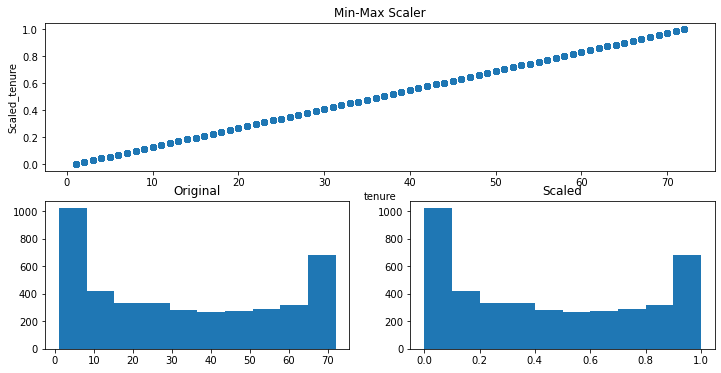

In [20]:
visualize_scaled_data(sklearn.preprocessing.MinMaxScaler(), 'Min-Max Scaler', 'tenure')

**2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data**

In [21]:
train.head()

,customer_id,total_charges,monthly_charges,tenure,monthly_charges_scaled
566,2474-LCNUE,1642.75,73.65,23,0.551244
3800,4465-VDKIQ,1358.60,77.80,18,0.592537
328,1410-RSCMR,515.75,71.35,7,0.528358
6182,4323-ELYYB,218.55,20.00,13,0.017413
1289,5356-CSVSQ,174.20,64.60,3,0.461194


In [22]:
scaler = sklearn.preprocessing.MinMaxScaler()

In [23]:
scaled = scaler.fit_transform(train[['monthly_charges', 'tenure']])
scaled

array([[0.55124378, 0.30985915],
       [0.59253731, 0.23943662],
       [0.52835821, 0.08450704],
       ...,
       [0.64577114, 0.32394366],
       [0.67114428, 0.        ],
       [0.51741294, 0.        ]])

In [24]:
scaled_df = pd.DataFrame(scaled, index=train.index, columns=['monthly_charges', 'tenure'])

In [25]:
scaled_df.head()

,monthly_charges,tenure
566,0.551244,0.309859
3800,0.592537,0.239437
328,0.528358,0.084507
6182,0.017413,0.169014
1289,0.461194,0.028169


In [26]:
# the actual inversing of the scaled data
scaler.inverse_transform(scaled_df)

array([[73.65, 23.  ],
       [77.8 , 18.  ],
       [71.35,  7.  ],
       ...,
       [83.15, 24.  ],
       [85.7 ,  1.  ],
       [70.25,  1.  ]])

**3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.**

- link: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html

**4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?** 
- What we notice is that the scaled data is now more normalized within the scaled truly showing a forced normalized dataset from the original dataset

# using the same code as above but switching with the 'output_distribution' argument
visualize_scaled_data(sklearn.preprocessing.QuantileTransformer(output_distribution='normal'), 'Quantile Scaler; Normal Distribution', 'monthly_charges')

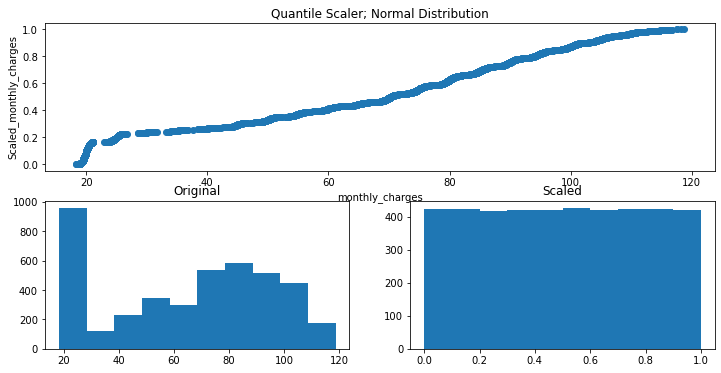

In [27]:
visualize_scaled_data(sklearn.preprocessing.QuantileTransformer(), 'Quantile Scaler; Normal Distribution', 'monthly_charges')

**5.  Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!**

In [28]:
def Min_Max_Scaler(X_train, X_validate, X_test):
    """
    Takes in X_train, X_validate and X_test dfs with numeric values only
    Returns scaler, X_train_scaled, X_validate_scaled, X_test_scaled dfs 
    """
    scaler = sklearn.preprocessing.MinMaxScaler().fit(X_train)
    X_train_scaled = pd.DataFrame(scaler.transform(X_train), index = X_train.index, columns = X_train.columns)
    X_validate_scaled = pd.DataFrame(scaler.transform(X_validate), index = X_validate.index, columns = X_validate.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), index = X_test.index, columns = X_test.columns)
    
    return scaler, X_train_scaled, X_validate_scaled, X_test_scaled

In [29]:
X_train = train[['monthly_charges', 'tenure']]
X_validate = validate[['monthly_charges', 'tenure']]
X_test = test[['monthly_charges', 'tenure']]

In [30]:
# Use the Standard_Scaler Function defined above

scaler, X_train_scaled, X_validate_scaled, X_test_scaled = Min_Max_Scaler(X_train, X_validate, X_test)

X_train_scaled.head()

,monthly_charges,tenure
566,0.551244,0.309859
3800,0.592537,0.239437
328,0.528358,0.084507
6182,0.017413,0.169014
1289,0.461194,0.028169


In [31]:
#test the function
import prepare

In [32]:
prepare.Min_Max_Scaler(X_train, X_validate, X_test)

(MinMaxScaler(),
       monthly_charges    tenure
 566          0.551244  0.309859
 3800         0.592537  0.239437
 328          0.528358  0.084507
 6182         0.017413  0.169014
 1289         0.461194  0.028169
 ...               ...       ...
 6640         0.011443  0.000000
 1227         0.110448  0.098592
 4188         0.645771  0.323944
 4044         0.671144  0.000000
 2926         0.517413  0.000000
 
 [4218 rows x 2 columns],
       monthly_charges    tenure
 6766         0.017910  0.774648
 18           0.259204  0.000000
 3018         0.633831  0.000000
 4079         0.869154  0.774648
 1014         0.323383  0.000000
 ...               ...       ...
 6596         0.058209  1.000000
 1746         0.314428  0.154930
 3312         0.888060  0.873239
 905          0.310448  0.211268
 1003         0.065672  0.521127
 
 [1407 rows x 2 columns],
       monthly_charges    tenure
 4203         0.803483  0.704225
 6651         0.019900  0.084507
 6595         0.008458  0.760563
 52